# Data Analysis
1. Based on "Latitude vs. Temperature " scatter plot we can see that teamprature near the equater is high and decreases as we move the further away from the equater.this is because the equator is closest to the sun.  

2. Based on "Northern Hemisphere Latitude vs Cloudiness" liner regression line we can see that Cloudiness increases as latitude increases.as we move futher away from the equator there will be less sun which might result into more cloud.

3. Based on "Northern Hemisphere Latitude vs Wind Speed" liner regression line we can see that wind speed increaes as latitude increases.since at equator the teapmrature is high so the pressure will be high and we move away from the equator pressure will be low so it will be windy beacuse of movement of air from high pressure to low pressure zone.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#import import_ipynb
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# Build query URL
url="http://api.openweathermap.org/data/2.5/weather?"
# city=""
query_url=url+"appid="+ weather_api_key+"&units=imperial"+"&q=" #+city

In [18]:
#declaring the list to capture the data for api calll.
lat = []
lon = []
city_name = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
country = []

#creating counter varibale for printing the citie number.
counter = 0 
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(city)
        counter = counter + 1
        print(f"Processing Record {counter}: {city}")
    except:
        print(f"City not found. Skipping {city}")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1: jijiga
Processing Record 2: ushuaia
City not found. Skipping barentsburg
Processing Record 3: lakes entrance
Processing Record 4: hobart
City not found. Skipping sentyabrskiy
Processing Record 5: kokkola
Processing Record 6: albany
Processing Record 7: buin
Processing Record 8: kahului
Processing Record 9: pevek
Processing Record 10: saint-pierre
Processing Record 11: new norfolk
Processing Record 12: boende
Processing Record 13: lagoa
Processing Record 14: cape town
Processing Record 15: sao bento do sul
Processing Record 16: hilo
Processing Record 17: rikitea
Processing Record 18: susurluk
Processing Record 19: daru
Processing Record 20: mataura
Processing Record 21: puerto ayora
Processing Record 22: sao filipe
Processing Record 23: novikovo
Processing Record 24: santa isabel do rio negro
City not found. Skipping umzimvubu
City not found. Skipping vaitupu
Processing Record 25: port alfred
Processing Record 2

Processing Record 226: kloulklubed
Processing Record 227: mehamn
Processing Record 228: qaanaaq
City not found. Skipping karistos
Processing Record 229: punta de bombon
Processing Record 230: purpe
Processing Record 231: nijar
City not found. Skipping mrirt
Processing Record 232: lamlash
Processing Record 233: beloha
Processing Record 234: makakilo city
Processing Record 235: vaitape
Processing Record 236: lazarev
Processing Record 237: kapiri mposhi
Processing Record 238: kungurtug
City not found. Skipping tsihombe
Processing Record 239: norman wells
Processing Record 240: praia da vitoria
Processing Record 241: torbay
Processing Record 242: banepa
Processing Record 243: maragogi
Processing Record 244: deder
Processing Record 245: labuhan
Processing Record 246: khani
Processing Record 247: high rock
Processing Record 248: chihuahua
Processing Record 249: itarema
Processing Record 250: dayong
Processing Record 251: santa rosa
Processing Record 252: saint george
Processing Record 253: a

Processing Record 463: japura
Processing Record 464: iwanai
Processing Record 465: zhigansk
Processing Record 466: grindavik
Processing Record 467: sinegorye
City not found. Skipping jahrom
Processing Record 468: puerto del rosario
Processing Record 469: tarakan
Processing Record 470: deqing
Processing Record 471: imbituva
Processing Record 472: columbus
Processing Record 473: sao jose da coroa grande
City not found. Skipping khormuj
Processing Record 474: bathsheba
Processing Record 475: aloleng
Processing Record 476: auki
Processing Record 477: anchorage
City not found. Skipping grimari
City not found. Skipping ust-kamchatsk
Processing Record 478: dalvik
Processing Record 479: uglovskoye
Processing Record 480: ihosy
Processing Record 481: porto walter
Processing Record 482: maracacume
City not found. Skipping wulanhaote
Processing Record 483: illapel
Processing Record 484: sorland
Processing Record 485: peace river
Processing Record 486: la brea
Processing Record 487: palmer
City not

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#create dictionary for all the variables that extract from openweather
weather_data_df = pd.DataFrame({"city": city_name,
                           "Cloundiness": cloudiness,
                           "Country": country,
                           "Date": date,
                           "Humidity":humidity,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Max Temp": temp,
                           "Wind Speed": wind_speed,
                            })

In [20]:
weather_data_df.head()

,city,Cloundiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,jijiga,35,ET,1665350250,70,9.3500,42.8000,64.13,4.45
1,ushuaia,40,AR,1665349883,81,-54.8000,-68.3000,44.26,14.97
2,lakes entrance,7,AU,1665350251,76,-37.8811,147.9810,47.16,6.04
3,hobart,40,AU,1665349971,81,-42.8794,147.3294,49.05,10.36
4,kokkola,0,FI,1665350127,96,63.8385,23.1307,46.92,8.05


In [21]:
# output data to csv
weather_data_df.to_csv("../output_data/city_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
high_humidity_df = weather_data_df[(weather_data_df['Humidity'] > 100)]
high_humidity_df

,city,Cloundiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed


In [23]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df.index

Int64Index([], dtype='int64')

# skiping the step beacuse there is no citiy humidy over 100%

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

C:\Users\User\AppData\Local\Temp\ipykernel_6592\1256264373.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


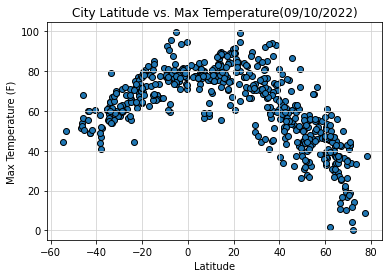

In [28]:
plt.scatter(weather_data_df["Latitude"],weather_data_df["Max Temp"],edgecolors="black")
plt.title("City Latitude vs. Max Temperature(09/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig(f'../output_data/City Latitude vs. Max Temperature.png')
plt.show() 

from above graph we can see that near equator have high teprature and teaprature gradually decreases away from equator.

## Latitude vs. Humidity Plot

C:\Users\User\AppData\Local\Temp\ipykernel_6592\1227241053.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


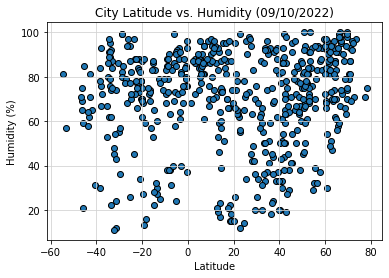

In [29]:
#create a Scatter Plot for Latitude vs. Humidity Plt
plt.scatter(weather_data_df["Latitude"],weather_data_df["Humidity"],edgecolors="black")
plt.title("City Latitude vs. Humidity (09/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig(f'../output_data/City Latitude vs. Humidity.png')
plt.show() 


from above graph we can see that near equator have generally high humidity.

## Latitude vs. Cloudiness Plot

C:\Users\User\AppData\Local\Temp\ipykernel_6592\1589450820.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


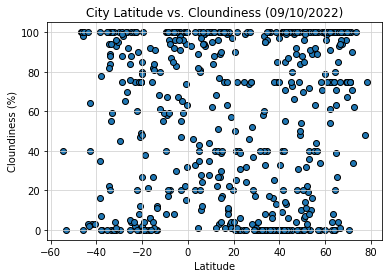

In [30]:
plt.scatter(weather_data_df["Latitude"],weather_data_df["Cloundiness"],edgecolors="black")
plt.title("City Latitude vs. Cloundiness (09/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloundiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.savefig(f'../output_data/City Latitude vs. Cloundiness.png')
plt.show() 


above graph shows near equator there no citiy witn 0 cloundiness.city near equator have more cloundiness. 

## Latitude vs. Wind Speed Plot

C:\Users\User\AppData\Local\Temp\ipykernel_6592\4144888928.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


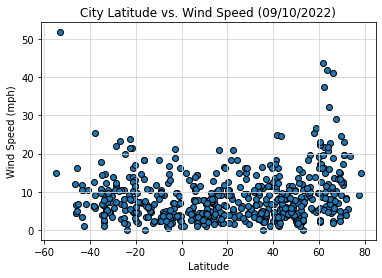

In [31]:
plt.scatter(weather_data_df["Latitude"],weather_data_df["Wind Speed"],edgecolors="black")
plt.title("City Latitude vs. Wind Speed (09/10/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig(f'../output_data/City Latitude vs. Wind Speed.png')
plt.show() 


from above graph of latitude and wind speed based on scatter plot we can see that if we move away from equator few citiy have higher wind speed. 

## Linear Regression

In [32]:
#creating the function for liner regression line and plot.
# regEQplotX: x cordinate for liner regression euation postion.
# regEQplotY:  y cordinate for liner regression euation postion.

#creating a function for liner regression, so that we can use it for all the plot below.  
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-value is: {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [34]:
#creating data fram for northern hemisphere.
northern_df = weather_data_df[weather_data_df["Latitude"] >= 0]
#creating data fram for southern hemisphere.
southern_df = weather_data_df[weather_data_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8116777895779271
y = -0.8x + 90.87


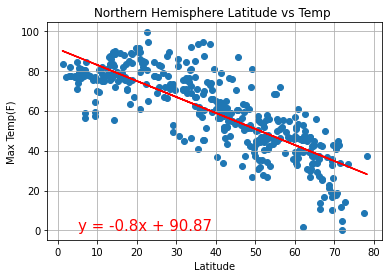

In [35]:
#set the data sets to compare
x_values = northern_df["Latitude"]
y_values = northern_df["Max Temp"]
#creating varibale for x and y cordinates for regression equation 
regEQplotX = 5
regEQplotY = 0
y_label = "Max Temp(F)"
plt.title(f'Northern Hemisphere Latitude vs Temp ')
#calling the function .
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save the file in output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp.png')
plt.show() 

as the latitude increases temperature is decreaseing.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7860130572612862
y = 0.65x + 82.32


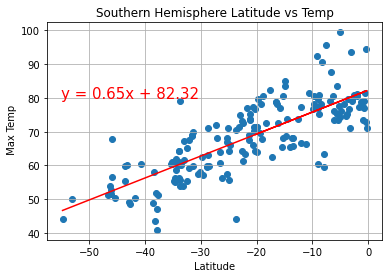

In [36]:
x_values = southern_df["Latitude"]
y_values = southern_df["Max Temp"]
#creating varibale for x and y cordinates for regression equation 
regEQplotX = -55
regEQplotY = 80
y_label = " Max Temp"
plt.title(f'Southern Hemisphere Latitude vs Temp')
#calling the function .
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp.png')
plt.show()

from above  graph we can see tha teparature is increasing as latitude is increasing.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11127499125238345
y = 0.12x + 65.91


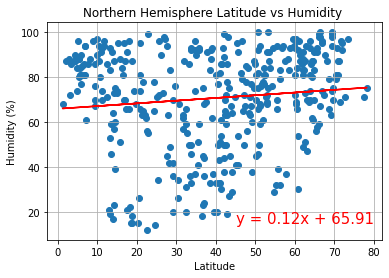

In [37]:
x_values = northern_df["Latitude"]
y_values = northern_df["Humidity"]
#creating varibale for x and y cordinates for regression equation 
regEQplotX = 45
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f'Northern Hemisphere Latitude vs Humidity ')
#calling the function .
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Humidity .png')
plt.show()

from above graph we can see that as latitude is increasing humidity is also increasing.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07259522051957683
y = 0.11x + 71.8


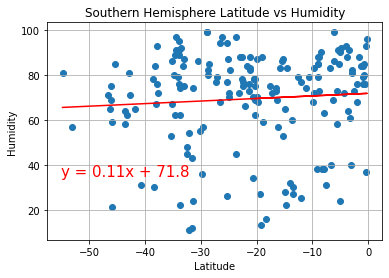

In [41]:
x_values = southern_df["Latitude"]
y_values = southern_df["Humidity"]
#creating varibale for x and y cordinates for regression equation 
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity"
plt.title(f'Southern Hemisphere Latitude vs Humidity')
#calling the function .
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Humidity on.png')
plt.show()

from above graph we can see that latitude is increasing humidity is also increasing.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14562818248797507
y = 0.29x + 45.22


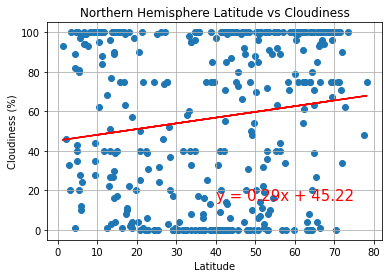

In [42]:
x_values = northern_df["Latitude"]
y_values = northern_df["Cloundiness"]  
#creating varibale for x and y cordinates for regression equation 
regEQplotX = 40
regEQplotY = 15
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness')
#calling the function .
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on.png')
plt.show()

from above graph we can see that latitude is increasing cloudiness is also increasing.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10936580145257575
y = 0.32x + 65.72


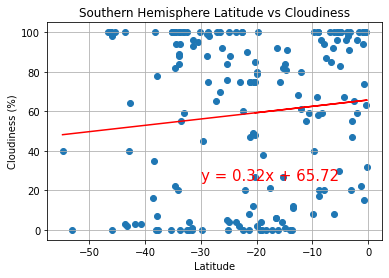

In [43]:
x_values = southern_df["Latitude"]
y_values = southern_df["Cloundiness"]
#creating varibale for x and y cordinates for regression equation 
regEQplotX = -30
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness')
#calling the function .
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on.png')
plt.show()

from above graph we can see that latitude is increasing cloudiness is also increasing. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.29234289449997825
y = 0.09x + 5.13


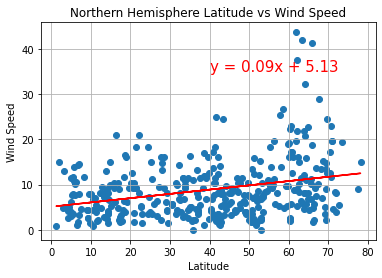

In [48]:
x_values = northern_df["Latitude"]
y_values = northern_df["Wind Speed"]
#creating varibale for x and y cordinates for regression equation 
regEQplotX = 40
regEQplotY = 35
y_label = "Wind Speed"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed')
#calling the function .
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on.png')
plt.show()

from above graph we can see that latitude is increasing wind speed is also increasing.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.20748533436037453
y = -0.1x + 6.39


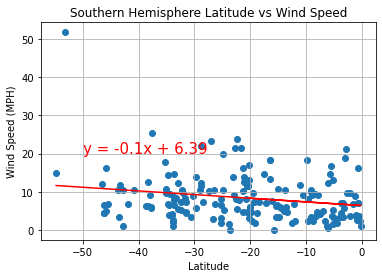

In [49]:
x_values = southern_df["Latitude"]
y_values = southern_df["Wind Speed"]
#creating varibale for x and y cordinates for regression equation 
regEQplotX = -50
regEQplotY = 20
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed')
#calling the function .
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed on.png')
plt.show()

from above graph we can see that latitiude is increasing wind speeed is decreasing.